In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['figure.figsize'] = [20, 10]

In [63]:
# calculate differences between browser and os data
def get_differences(browser: pd.Series, os: pd.Series) -> list:
    assert len(browser) == len(os)
    diffs = [] 
    for i in range(0, len(browser)):
        diffs.append(abs(browser.loc[i] - os.loc[i])  * 1000)

    return diffs

# calculate differences between browser and os data
def get_keydown_time_differences(browser: pd.Series, os: pd.Series) -> list:
    diffs = [] 
    for i in range(0, len(browser), 2):
        hold_time_browser =  abs(browser[i + 1] - browser[i]) * 1000
        hold_time_os =  abs(os[i + 1] - os[i]) * 1000


        diffs.append(abs(hold_time_browser - hold_time_os))

    return diffs

In [64]:
def calc(diffs_natural, diffs_machine):
    diffs_natural = np.array(diffs_natural)
    diffs_machine = np.array(diffs_machine)

    r = 1

    mean = diffs_machine.mean()
    std = diffs_machine.std()
    min = diffs_machine.min()
    max = diffs_machine.max()

    print("Machine")
    print("Min : ", round(min, r))
    print("Max : ", round(max, r))
    print("Mean: ", round(mean, r))
    print("Std : ", round(std, r))

    mean = diffs_natural.mean()
    std = diffs_natural.std()
    min = diffs_natural.min()
    max = diffs_natural.max()

    print("Natural")
    print("Min : ", round(min, r))
    print("Max : ", round(max, r))
    print("Mean: ", round(mean, r))
    print("Std : ", round(std, r))

In [65]:
firefox = pd.read_csv("./firefox/complete.csv")
firefox_stress = pd.read_csv("./firefox_stresstest_own/complete.csv")

In [66]:
# firefox
firefox_diffs_natural = get_differences(firefox['browser_natural'], firefox['os_natural'])
firefox_diffs_machine = get_differences(firefox['browser_machine'], firefox['os_machine'])
calc(firefox_diffs_natural, firefox_diffs_machine)

Machine
Min :  0.0
Max :  0.7
Mean:  0.4
Std :  0.2
Natural
Min :  0.0
Max :  0.7
Mean:  0.2
Std :  0.2


In [67]:
# firefox stresstest | normal 50%
firefox_diffs_natural_normal_50 = get_differences(firefox_stress['browser_natural_normal_50'], firefox_stress['os_natural_normal_50'])
firefox_diffs_machine_normal_50 = get_differences(firefox_stress['browser_machine_normal_50'], firefox_stress['os_machine_normal_50'])
calc(firefox_diffs_natural_normal_50, firefox_diffs_machine_normal_50)

Machine
Min :  0.0
Max :  0.8
Mean:  0.6
Std :  0.2
Natural
Min :  0.0
Max :  11.2
Mean:  0.6
Std :  0.8


In [68]:
# firefox stresstest | normal 75%
firefox_diffs_natural_normal_75 = get_differences(firefox_stress['browser_natural_normal_75'], firefox_stress['os_natural_normal_75'])
firefox_diffs_machine_normal_75 = get_differences(firefox_stress['browser_machine_normal_75'], firefox_stress['os_machine_normal_75'])
calc(firefox_diffs_natural_normal_75, firefox_diffs_machine_normal_75)

Machine
Min :  0.0
Max :  14.8
Mean:  0.6
Std :  1.3
Natural
Min :  0.0
Max :  7.4
Mean:  0.6
Std :  0.6


In [69]:
# firefox stresstest | normal 100%
firefox_diffs_natural_normal_100 = get_differences(firefox_stress['browser_natural_normal_100'], firefox_stress['os_natural_normal_100'])
firefox_diffs_machine_normal_100 = get_differences(firefox_stress['browser_machine_normal_100'], firefox_stress['os_machine_normal_100'])
calc(firefox_diffs_natural_normal_100, firefox_diffs_machine_normal_100)

Machine
Min :  0.0
Max :  25.3
Mean:  1.1
Std :  2.8
Natural
Min :  0.0
Max :  12.5
Mean:  0.7
Std :  1.6


In [70]:
# firefox stresstest | abovenormal 75%
firefox_diffs_natural_abovenormal_75 = get_differences(firefox_stress['browser_natural_abovenormal_75'], firefox_stress['os_natural_abovenormal_75'])
firefox_diffs_machine_abovenormal_75 = get_differences(firefox_stress['browser_machine_abovenormal_75'], firefox_stress['os_machine_abovenormal_75'])
calc(firefox_diffs_natural_abovenormal_75, firefox_diffs_machine_abovenormal_75)

Machine
Min :  0.0
Max :  30.2
Mean:  2.4
Std :  4.6
Natural
Min :  0.0
Max :  19.0
Mean:  1.4
Std :  3.0


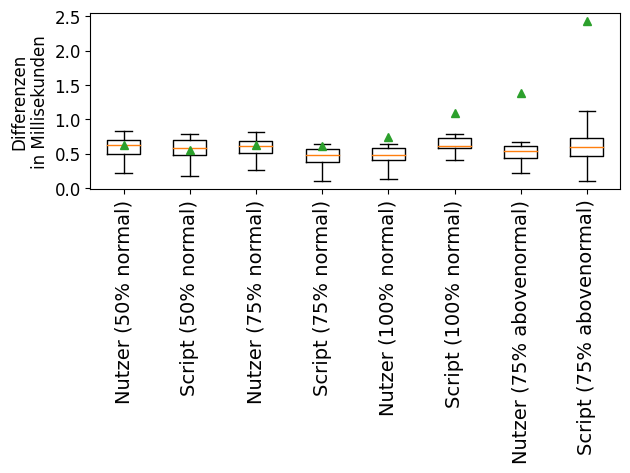

In [71]:
# plot
plt.boxplot([
    #firefox_diffs_natural, firefox_diffs_machine,
    firefox_diffs_natural_normal_50, firefox_diffs_machine_normal_50,
    firefox_diffs_natural_normal_75, firefox_diffs_machine_normal_75,
    firefox_diffs_natural_normal_100, firefox_diffs_machine_normal_100,
    firefox_diffs_natural_abovenormal_75, firefox_diffs_machine_abovenormal_75,
    ], labels=[
    #"Nutzer",                       "Script",
    "Nutzer (50% normal)",          "Script (50% normal)",
    "Nutzer (75% normal)",          "Script (75% normal)",
    "Nutzer (100% normal)",         "Script (100% normal)",
    "Nutzer (75% abovenormal)",     "Script (75% abovenormal)",
    ], showfliers=False, showmeans=True)
#plt.title("Differenzen zwischen Tasten-Haltedauer in Browsern und nativer Anwendung ( Firefox | Stresstest)", fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=12)
# plt.xlabel(xlabel="", fontsize=18)
plt.ylabel("Differenzen\nin Millisekunden", fontsize=12)
plt.tight_layout()
plt.savefig("./fig_stresstest_own.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()